# Tabla de contenidos
* [<font color='blue'> CLUSTERING </font>](#<font-color='blue'>-CLUSTERING-</font>)
	* [<font color='blue'> Objetivos  </font>](#<font-color='blue'>-Objetivos--</font>)
	* [<font color='blue'> Introducción </font>](#<font-color='blue'>-Introducción-</font>)
		* [¿Cuándo usamos estos métodos?](#¿Cuándo-usamos-estos-métodos?)
		* [¿Qué vamos a obtener?](#¿Qué-vamos-a-obtener?)
		* [Tipos de agrupamiento o segmentación](#Tipos-de-agrupamiento-o-segmentación)
		* [Medidas de similitud](#Medidas-de-similitud)
			* [Similitud (*Propiedades*)](#Similitud-%28*Propiedades*%29)
			* [Distancia (*Propiedades*)](#Distancia-%28*Propiedades*%29)
			* [Atributos numéricos](#Atributos-numéricos)
				* [Métricas de Distancia](#Métricas-de-Distancia)
	* [<font color='blue'> Algoritmos de Clustering </font>](#<font-color='blue'>-Algoritmos-de-Clustering-</font>)
		* [Jerárquico](#Jerárquico)
			* &nbsp;
				* [Métodos Aglomerativos](#Métodos-Aglomerativos)
				* [Métodos divisivos](#Métodos-divisivos)
				* [Desventaja del clustering jerárquico:](#Desventaja-del-clustering-jerárquico:)
		* [No Jerárquicos](#No-Jerárquicos)
		* [Algoritmo k-medias ( k-means) [MacQueen, 67]](#Algoritmo-k-medias-%28-k-means%29-[MacQueen,-67])
			* [Algoritmo](#Algoritmo)
			* [IMÁGENES ILUSTRATIVAS DEL EJEMPLO](#IMÁGENES-ILUSTRATIVAS-DEL-EJEMPLO)
			* [Comentarios finales](#Comentarios-finales)
	* [<font color='blue'> Algoritmo $k$-means in Python </font>](#<font-color='blue'>-Algoritmo-$k$-means-in-Python-</font>)
		* [Importar las librerías](#Importar-las-librerías)
		* [Importar el conjunto de datos](#Importar-el-conjunto-de-datos)
		* [Elegir el mejor valor de $k$](#Elegir-el-mejor-valor-de-$k$)
		* [Construir el modelo  $k$-means](#Construir-el-modelo--$k$-means)
		* [Visualizar los resultados](#Visualizar-los-resultados)
		* [Predecir nuevos ejemplos](#Predecir-nuevos-ejemplos)
	* [<font color='blue'> Conclusiones </font>](#<font-color='blue'>-Conclusiones-</font>)


# <font color='blue'> CLUSTERING </font>

## <font color='blue'> Objetivos  </font>

* Introducción al concepto de agrupamiento
* Medidas de similitud
* Diferencias entre clustering jerárquico y no jerárquico
* Conocer el funcionamiento de uno de los algoritmos de clustering más conocido: k-means

## <font color='blue'> Introducción </font>

Podríamos definir el concepto de agupamiento como 

> *Proceso de agrupar instancias en clases o clusters de tal forma que los objetos de un cluster tengan una similitud alta entre ellos y baja con objetos de otros clusters*.

Hay que recordar que en esta técnica se usa el aprendizaje no supervisado, es decir, el aprendizaje se lleva a cabo sobre un conjunto de ejemplos formados por sólo entradas al sistema, no se cuenta con información sobre la salida, sobre la variable respuesta, para esos registros.

> No hay variable a predecir, se pretende descubrir una estructura en los datos.<br>Por ejemplo: Obtener dos grupos de clientes con gustos similares sobre el cine para poder analizar análisis de mercado.

> Es el punto de partida para realizar un posterior análisis de clasificación sobre los cluster.

* Aprendizaje no supervisado:

   * **Reglas de asociación**: estudiadas en el tema anterior.

   * **Agrupamiento (Clustering)**: agrupación de los ejemplos que comparten características comunes en diferentes subconjuntos o clusters. 
   
   Según se construyan los agrupamientos:

      * Jerárquico. Se utiliza para variables cuantitativas o cualitativas. Se usa cuando el número de objetos no es muy grande. No se conoce a priori el número de clusters

      * No jerárquico (particional). Se puede aplicar sólo a variables cuantitativas. Se puede usar para un número grande de objetos, ya que no requiere calcular todas las distancias. Se debe conocer a priori el número de clusters.


### ¿Cuándo usamos estos métodos?

Esta es una pregunta clave, para responderla podemos tener en cuenta dos ideas:

* La recopilación y clasificación manual es muy costosa
* La caracterización de los patrones cambia con el tiempo o con el corpus

La siguiente pregunta interesante sería, una vez que hemos decidido hacer uso de esta herramienta,

### ¿Qué vamos a obtener?

* Que los agrupamientos sean útiles a la hora de construir clasificadores. 
* Que el descubrimiento de grupos y subgrupos revelen la naturaleza de la estructura de nuestro problema.

### Tipos de agrupamiento o segmentación

* Clustering cuantitativo:

    * Atributos numéricos
    * Basado en la vecindad entre los elementos de la población

* Clustering cualitativo:
    * Atributos categóricos
    * La partición de los datos es buena si cada clase tiene una interpretación conceptual (modelo cognitivo de jerarquías) [Michalski, 83]

### Medidas de similitud

#### Similitud (*Propiedades*)

Diremos que la función $s$ tal que $s: X \times X \rightarrow R$ es una función de similitud, si y sólo si cumple las siguientes propiedades:

* $s(x,x)\gt 0$
* $s(x,y) = s(y,x)$
* $s(x,y) \geq 0$

#### Distancia (*Propiedades*)

Diremos que la función $d$ tal que: $d: X \times X \rightarrow R$ es una función de distancia si y sólo si cumple:

* $d(x,x)\gt 0$
* $d(x,y) = d(y,x)$

Si además de estas dos, se cumplen estas tres propiedades, entonces se trata de una *métrica*

* $d(x,y) \geq 0$
* $d(x,y) = 0$ si $x=y$
* $d(x,y) \leq d(x,z)+d(z,y)$

#### Atributos numéricos

Usualmente se realiza un proceso de estandarización de los datos. 

$$ Z_{if}=\frac{X_{if}-\mu_f}{\sigma_f} $$

La medida z (z-score) elimina las unidades de los datos.

Las dos componentes $\sigma_f$ y $\mu_f$, ses corresponden respectivamente con la desviación media absoluta de la variable f y la media de la misma:

$$ \sigma_f = \frac{1}{n}(|x_{1f}-\mu_f| + |x_{2f}-\mu_f| + ... +|x_{nf}-\mu_f|) $$

$$ \mu_f = \frac{1}{n} (x_{1f}+x_{2f}+...+x_{nf}) $$

##### Métricas de Distancia

* Distancia Euclídea
$$ d(x,y) = \sqrt{\sum_{j=1}^p |x_j - y_j|^2} = \sqrt{(x-y)'(x-y)} = ||x-y|| $$

* Distancia de Manhatan
$$ d(x,y)=\sum_{j=1}^p |x_j - y_j| $$

* Distancia de Minkowki
$$ d_q(x,y)=(\sum_{j=1}^p |x_j - y_j|^q)^{\frac{1}{q}}, q\geq 1 $$
*Si q=1 (Manhatan), si q = 2 (Euclídea)*

* Distancia de Mahalanobis:
$$ d(x,y)= \sqrt{(x-y)'C^{-1}(x-y)} $$
$C^{-1}\leftarrow$ *Matriz de covarianza*

* Independientemente de la función de distancia elegida, siempre vamos a poder obtener una matriz de distancia $N\times N$ <br> ($\frac{N\cdot (N-1)}{2} $ valores diferentes de 0 y diferentes entre sí)

* La selección de medida de distancia es importante, ya que condiciona a los agrupamientos.
* Se puede  usar como medida de similitud la correlación entre las variables, pudiendo definir como distancia: $ 1- corr$

## <font color='blue'> Algoritmos de Clustering </font>

### Jerárquico

* Clustering jerárquico: las agrupaciones de los ejemplos suelen ser de manera arborescente o dendrograma. Construye o deshace una jerarquía de clusters. Dos tipos:

    * Aglomerativos o incrementales: comienza cada ejemplo formando un cluster y se van agrupando formando clusters hasta que se alcanza un criterio de parada.

    * Divisivos o decrementales: comienzan con todos los ejemplos formando un único cluster y se va diviendo hasta satisfacer un criterio de parada.

##### Métodos Aglomerativos

Se comienza formando un cluster por cada ejemplo, según la distancia elegida, se seleccionan los dos puntos más próximos formando un grupo, obteniendo N-1 grupos.
Se unen los dos grupos más cercanos. Y así sucesivamente hasta que:
* Todos los puntos estén en un único cluster
* Se alcance un número de grupo prefijado
* Se detecte, a través de un contraste de significación, que hay razones estadísticas para no continuar con el agrupamiento, porque los más similares no sean lo suficientemente homogéneos como para estar en un mismo cluster.

> **Lo más importante es detectar cuándo debemos parar, no llegar a un único cluster**

Tenemos varias formas de definir la distancia entre grupos:

* Enlace simple (Simple linkage): distancia más corta, vecino más cercano. Mínimo de las distancias entre un objeto de un cluster y un ejemplo de otro.
* Enlaces promedio entre grupos (Average linkage): distancia promedio entre todas las posibles distancias entre puntos de uno y otro grupo.
* Enlace completo (Complete linkage): distancia más grande, vecino más lejano. Máximo de las distancias entre un objeto de un cluster y un ejemplo de otro.

##### Métodos divisivos

Estos son conceptualmente opuestos a los aglomerativos. Comenzamos con un único cluster formado por todos los ejemplos, según la distancia elegida, se va dividiendo primero en dos clusters, luego en tres y así sucesivamente. No hay por qué llegar a formar $N$ clusters.


##### Desventaja del clustering jerárquico:

Una vez los ejemplos clasificados en un cluster, los métodos jerárquicos no permiten reubicar objetos que pudieran haber sido mal clasificados.

Los métodos no jerárquicos sí permiten esa reubicación.

### No Jerárquicos

Produce una partición única formando todos los clusters a la vez. Se tiene que conocer a priori el número de grupos en los que dividir el conjunto de datos. Algoritmos que emplean esta técnica:

    * Método k-medoids
    * Método k-means

### Algoritmo k-medias ( k-means) [MacQueen, 67]

#### Algoritmo

1. Fijar el valor de $k$, número de clusters 
1. Elegir $k$ ejemplos que actúan como semillas (centroides de las $k$ clases a buscar).
1. Calcular las distancias entre el resto de los ejemplos a todos los $k$ centroides, asignando cada objeto al cluster más cercano.
1. Recalcular el centroide de cada clase (media de los elementos del cluster), pasando a ser la nueva semilla.
1. Repetir pasos 2 y 3 hasta que se alcance un criterio de convergencia (por ejemplo, que los centroides de todos los clusters permanezcan constantes).

#### IMÁGENES ILUSTRATIVAS DEL EJEMPLO

<img src="../Figuras/kmeans1.png" alt="kmeans1" width="200"/> 

<img src="../Figuras/kmeans2.png" alt="kmeans2" width="200"/>

<img src="../Figuras/kmeans3.png" alt="kmeans3" width="200"/>

<img src="../Figuras/kmeans4.png" alt="kmeans4" width="200"/>

<img src="../Figuras/kmeans5.png" alt="kmeans5" width="200"/>

#### Comentarios finales

* Normalmente se utiliza una media de similitud basada en el error cuadrático: 
$$ E= \sum_{i=1}^k\sum_{k\in C_i} |p - m_i|^2 $$
  Siendo $p$ el ejemplo y $m_i$ la media del cluster $i$*
* Los centros de cada grupo (centroides) pueden coincidir con ejemplos o no. En este último caso se denominan *prototipos*.
* Es suceptible de valores extremos.
* No garantiza llegar a un mínimo global $\longrightarrow$ ejecutar varias veces con diferentes valores iniciales
* Variantes:
    * Utilizar la moda para agrupar objetos categóricos (k-modes)
    * Utilizar la mediana como centros en vez de las medias (k-medianas)
    * Construir un k-means jerárquico: se empieza con k=2 y se continúa formando clusters sucesivos en cada rama

## <font color='blue'> Algoritmo $k$-means in Python </font>

### Importar las librerías

El primer paso es importar las librerías requeridas.

In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import pandas as pd


# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer
 
    
# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D


# Configuración warnings
# ------------------------------------------------------------------------------
from warnings import filterwarnings
filterwarnings('ignore')

### Importar el conjunto de datos

In [2]:
# Importar base de datos Iris
iris = datasets.load_iris()

In [3]:
# Variables independientes
X = iris.data[:, :]
# Variable respuesta
y = iris.target

In [4]:
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

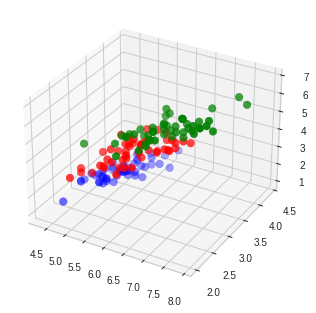

In [5]:
fig = plt.figure()
ax = Axes3D(fig)
colors=['blue','red','green','purple']
asignar=[]
for row in y:
    asignar.append(colors[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

### Elegir el mejor valor de $k$

Para poder seleccionar un valor idóneo para $k$ se puede utilizar la _norma del codo_. Consiste en realizar varias ejecuciones con distintos valores de $k$ y representarlas gráficamente. Puesto que la gráfica es una curva, se considera el número óptimo de clusters _el codo del brazo_.

In [12]:
k_range = range(2,15)
kmeans = [KMeans(n_clusters=i) for i in k_range]
scores = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
print(scores)

[-152.34795176035792, -78.85144142614601, -57.228473214285714, -46.461172672672674, -39.03998724608725, -34.29822966507177, -30.014398496240602, -28.13619428919894, -26.145689090149617, -24.355067958357434, -23.113007290095524, -21.564448802659328, -20.011007863481552]


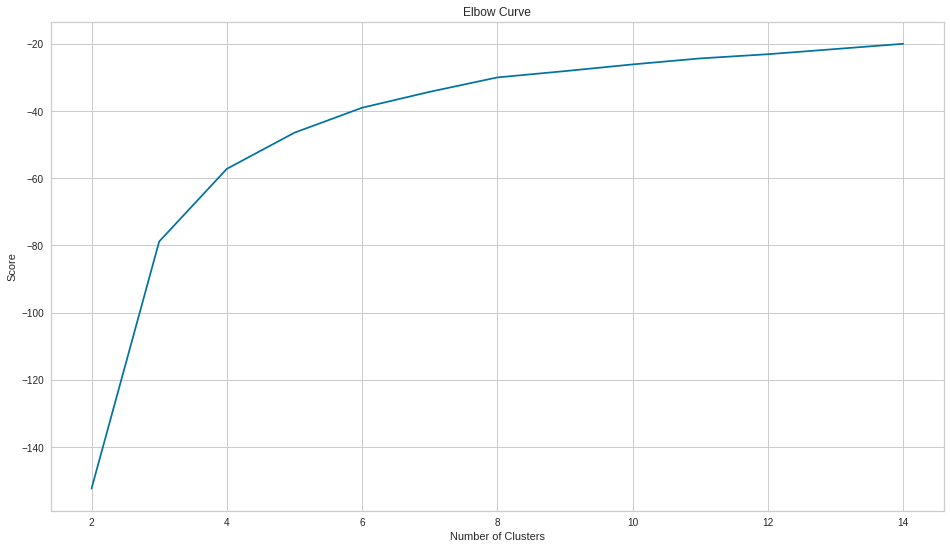

In [13]:
plt.rcParams['figure.figsize'] = (16, 9)
#plt.style.use('ggplot')
plt.plot(k_range,scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

La curva es bastante “suave”. Se puede considerar un buen valor de $k$ cualquier valor entre 4 y 8.

Text(0.5, 1.0, 'Elbow curve')

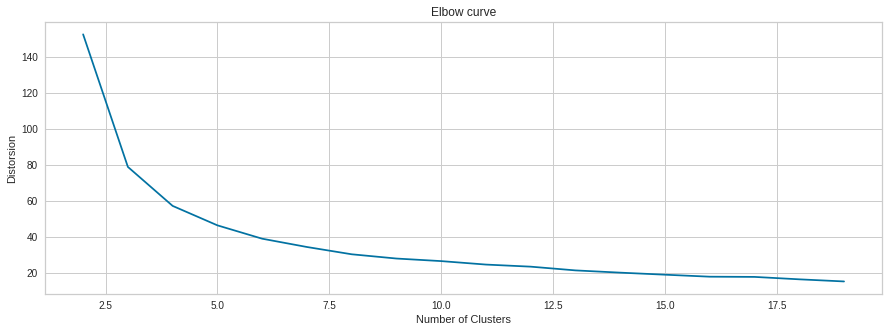

In [8]:
distorsion_score = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsion_score.append(k_means.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsion_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Distorsion')
#plt.grid(True)
plt.title('Elbow curve')

La librería _yellowbrick_ tiene un método rápido que ayuda a esta visualización: _KElbowVisualizer_. Anota el _codo_ con un línea vertical discontinua y visualiza también el tiempo empleado en el entrenamiento. Si no se desea visualizar el tiempo se puede ocultar con el parámetro _timings=false_. 

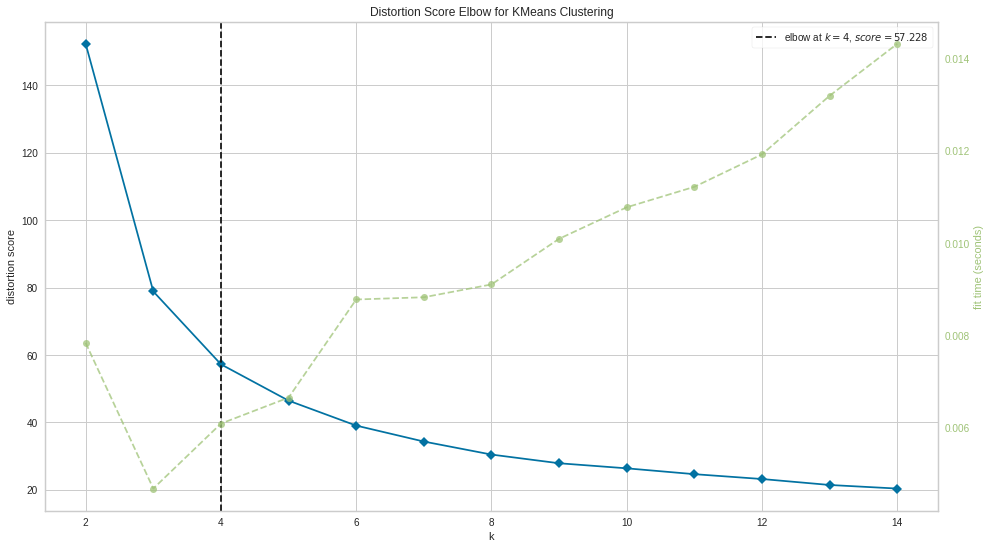

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(X)        #Entrenamiento con los datos
visualizer.show()

Por defecto usa _distorsion score_ que calcula la suma de las distancias al cuadrado desde cada punto hasta su centroide. Pero también se pueden usar otras dos métricas: _silhouette_ y _calinski_harabasz_. La primera calcula el coeficiente de silueta medio de todas las muestras, mientras que la segunda calcula la relación de dispersión entre y dentro de los grupos.

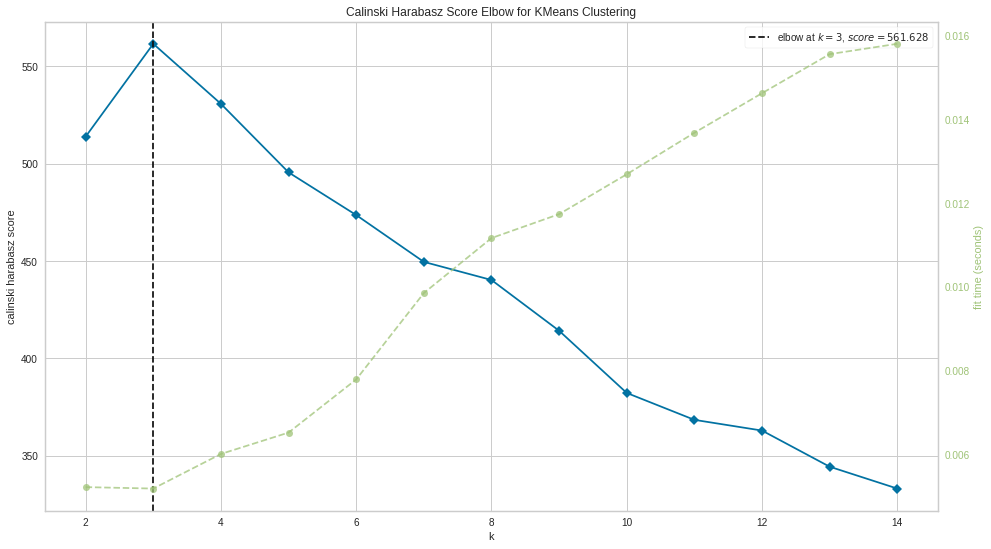

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [15]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), metric='calinski_harabasz')
visualizer.fit(X)        #Entrenamiento con los datos
visualizer.show()

También se puede usar el método rápido _kelbow_visualizer_, que construye el objeto _KElbowVisualizer_ con los argumentos asociados y realiza la visualización.

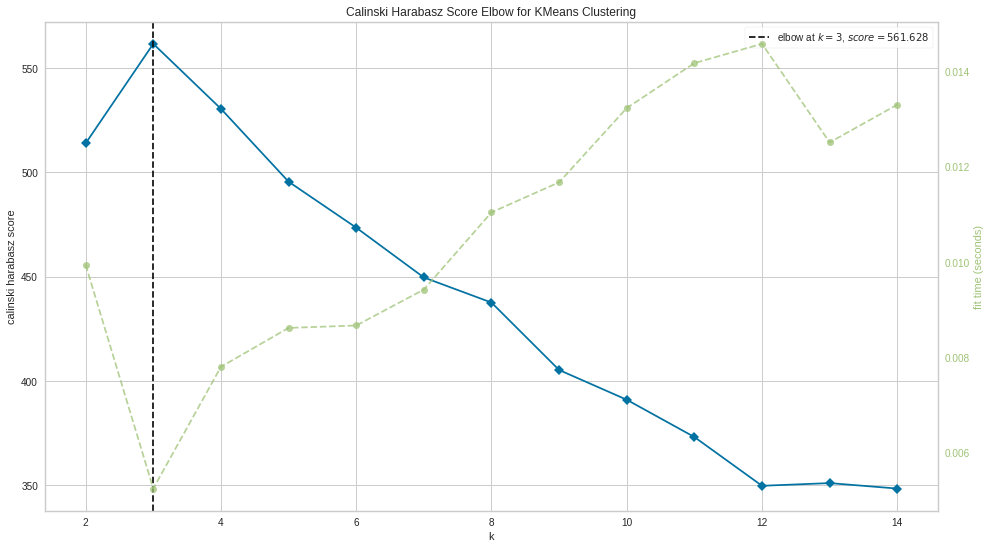

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>,
                 estimator=KMeans(n_clusters=14, random_state=4), k=(2, 15),
                 metric='calinski_harabasz')

In [16]:
kelbow_visualizer(KMeans(random_state=4), X, metric='calinski_harabasz', k=(2,15))

### Construir el modelo  $k$-means

In [17]:
# Se selecciona un valor de k igual a 4
n_cluster=4
# Se crea el modelo y se entrena con el conjunto de entrenamiento
kmeans = KMeans(n_clusters=n_cluster).fit(X)
centroides = kmeans.cluster_centers_
print(centroides)

[[5.53214286 2.63571429 3.96071429 1.22857143]
 [5.006      3.428      1.462      0.246     ]
 [6.9125     3.1        5.846875   2.13125   ]
 [6.2525     2.855      4.815      1.625     ]]


### Visualizar los resultados

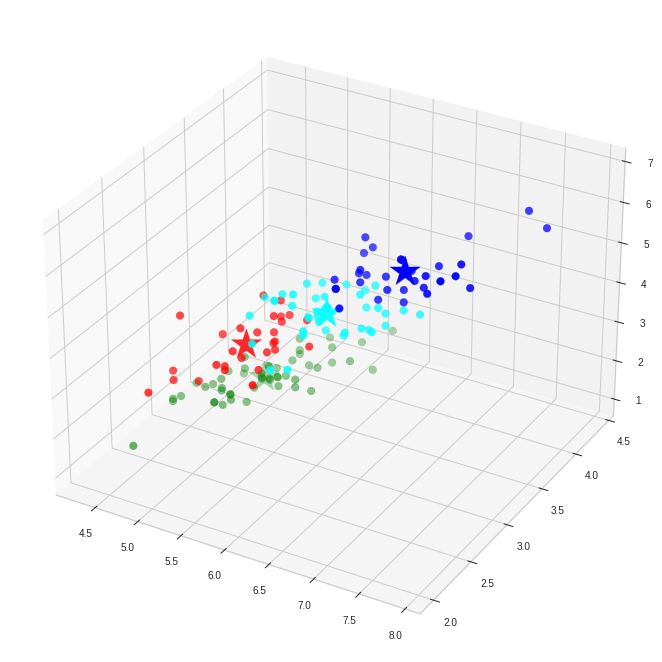

In [18]:
# Obtención de los clusters
labels = kmeans.predict(X)

# Centroides de los clusters
C = kmeans.cluster_centers_
colors=['red','green','blue','cyan']
assign=[]
for row in labels:
    assign.append(colors[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=assign, s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colors, s=1000)

In [19]:
#Se puede observar la categoría de la clase a la que pertenece con la etiqueta al cluster asignado
pred_X = pd.DataFrame({'Actual': y, 'Predicción': labels})
print(pred_X.head(105))

     Actual  Predicción
0         0           1
1         0           1
2         0           1
3         0           1
4         0           1
..      ...         ...
100       2           2
101       2           3
102       2           2
103       2           2
104       2           2

[105 rows x 2 columns]


In [20]:
#Se puede obtener el registro más cercano a su centroide
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([ 89,   7, 102, 126])

### Predecir nuevos ejemplos

In [21]:
print(kmeans.predict([[6, 2, 4.9, 1.5]]))


[3]


In [22]:
print(kmeans.predict([[4.4, 2.9, 1.4, 0.2]]))

[1]


In [23]:
print(kmeans.predict([[5.,3.4, 1.5, 0.2]]))

[1]


## <font color='blue'> Conclusiones </font>

Se ha construido un modelo de Clustering en lenguaje de programación Python, en concreto se ha aplicado el algoritmo
$k$-means. Los algoritmos de Clustering son muy útiles para descubrir estructuras en los datos. Son fáciles de implementar y de interpretar. Sin embargo, son sensibles a los outliers, los valores atípicos hacen que el cluster se vea afectado, pero sí es una ventaja si se quieren usar para la detección de anomalías. También requieren mucho tiempo si se trabaja con grandes conjuntos de datos.

Este algoritmo puede ser usado en casi cualquier dominio:

* Segmentación de imágenes
* En compañías, banca,...
* Ciberseguridad: detección de fraude, detección de perfiles cibernéticos,...
* Clasificación de documentos

<img src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png"/> 

Esta obra está bajo una Licencia Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional.
Para ver una copia de esta licencia, véase http://creativecommons.org/licenses/by/4.0/
